Introduction to Python
================================

Lesson 4 - Part1
--------

## Summary 

In this lesson we will explore a little more in dept some aspects of Keras and neural networks.
The topis that we'll cover in this lesson are:

  - Dropout
  - Grid Search
  - Autoencoders
  
But before starting with the real Lesson let's make a little bit of informations. 

Informations
---

## Exam modality 

The exams will be a code snippet to comment.

It may be required to give an high level or a *line by line* explanation.

The arguments will be the same that we have touched in this four lessons.

Let's start with the lesson
----

## Droptout

Dropout is a method often used on neural networks in order to avoid/reduce orverfitting.

The idea is to randomly shut down some neurons at each iteration in order to make them less relevant for the network.   

For this dropout is a layer itself, as you can see from the [Keras docs](https://keras.io/layers/core/), that we put on top of another layer.

Let's see how we can improve the network that we have created for the **mnist** classification task last lesson.

## Re-factoring

In order to improve the code even more, we'll make a little bit of re-factoring and re-write it using Python Classes.

**NOTE**: please note how the names of classes and function are written. As you can see 

  - every class has a name that starts with a **uppercase** letter
  - every function has a name that starts with a **lowercase** letter
  
This is due to a style convention used in Python coding called [pep8](https://www.python.org/dev/peps/pep-0008/).

## Exercise 

For the code below:

  - Give an *high level* description of what the code does
  - Give a *line by line* description of the methods `modelDefinition` and the class `PlotGraphs`.

**HINT**: `string.find(substring)` searches for a substring in a string. Returns `True` if present. 

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import logging
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import advanced_activations
from keras.optimizers import Adam
import keras
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger('')

# Parameters
learning_rate = 0.001
num_steps = 15
batch_size = 128

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

metrics = ['accuracy','mae']


class PrepareVariabiles:
    def __init__(self):
        self.mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
        
        
    def splitDatset(self):
        X = self.mnist.train.images
        Y = self.mnist.train.labels
        X_test = self.mnist.test.images
        Y_test = self.mnist.test.labels
        return X,Y,X_test,Y_test
    
class CreateNN:
    def __init__(self,**kargs):
        self.activationFun = 'relu'
        self.dropPerc = 0.25
        self.X = kargs['x']
        self.Y = kargs['y']
        self.X_test = kargs['xt']
        self.Y_test = kargs['yt']
        
        
    def modelDefinition(self,useDropout=False):
        self.model = Sequential()
        self.model.add(Dense(num_input, input_dim=num_input,activation=self.activationFun))
        if useDropout:
            self.model.add(Dropout(self.dropPerc))
        self.model.add(Dense(n_hidden_1,activation=self.activationFun))
        if useDropout:
            self.model.add(Dropout(self.dropPerc))
        self.model.add(Dense(n_hidden_2,activation=self.activationFun))
        self.model.add(Dense(num_classes,activation='softmax'))
        
    def modelCompile(self):
        adam = Adam(lr=learning_rate)
        self.model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=metrics)
        
    def modelEval(self):
        tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/msaletta/workingDir/Cattolica2019/FourthLesson/graphs',write_graph=True, write_images=True,embeddings_freq=0)
        history = self.model.fit(self.X, self.Y, epochs=num_steps, batch_size=batch_size,validation_data=(self.X_test,self.Y_test),callbacks=[tbCallBack])#validation_split=0.05
        scores = self.model.evaluate(self.X_test, self.Y_test)
        return history,scores,self.model
    
class PlotGraphs:
    def __init__(self,**kargs):
        history= kargs['h']
        self.history_dict = history.history
        self.metList = []
        for cur_key in history.history.keys():
            if cur_key.find('val')!=0:
                self.metList.append(cur_key)
        print(self.metList)
        self.lenList = len(self.metList)
    
    def plotResults(self):
        plotPos = 1
        for cur_met in self.metList:
            cur_values = self.history_dict[cur_met]
            cur_val = self.history_dict['val_%s'%cur_met]
            epochs = range(1, len(cur_values) + 1)
            plt.subplot(self.lenList, 1, plotPos)
            plt.plot(epochs, cur_values, 'ro')
            plt.plot(epochs, cur_val, 'b+')
            plt.xlabel('Epochs')
            plt.ylabel(cur_met)
            plotPos += 1


def main():
    start_time = datetime.now()
    logger.info('START')
    logger.info('INITIALIZATION OF PREPAREVARIABILES')
    pv = PrepareVariabiles()
    X, Y, X_test, Y_test = pv.splitDatset()
    logger.info('INITIALIZATION OF CREATENN')
    cnn = CreateNN(x=X,y=Y,xt=X_test,yt=Y_test)
    cnn.modelDefinition()#useDropout=True
    cnn.modelCompile()
    history, scores, model = cnn.modelEval()
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    logger.info('INITIALIZATION OF PLOTGRAPH')
    pg = PlotGraphs(h=history)
    pg.plotResults()
    logger.info("EXECUTED IN %f SEC"%((datetime.now()-start_time)).total_seconds())
    logger.info('END')
    return history,model

In [ ]:
history = main()

In [ ]:
history.history.keys()
# for cur_key in history.history.keys():
#     if cur_key.find('val')!=0:
#         print(cur_key)
model

## Tensorboard

Tensorboard is a tool for make a visual inspection on a network created with Tensorflow (ans so also with Keras).

The argument is very complex and you can find more information at [Keras callbacks man page](https://keras.io/callbacks/). We won't go in any details now.

The command that enables us to use Tendorboard is

`tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph',write_graph=True, write_images=True,embeddings_freq=0)`

The callback is used in fit by `callbacks=[tbCallBack]` ad produces a series of file in the `log_dir` folder (it also create it).

The result is visible running `tensorboard --logdir Graph` and opening at `http://localhost:6006` in the browser.

## Grid Search 

The `grid search` is the names the `sklearn` uses to indicate the **hyper parameter optimization** ([form wiki](https://en.wikipedia.org/wiki/Hyperparameter_optimization)):

*In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.
The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.*

The package that we'll use is `GridSearchCV` from `sklearn.model_selection` ([documentation page](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)).

As you can see at main Sklearn's page about [Tuning Hyper Parameters](http://scikit-learn.org/stable/modules/grid_search.html), this is just one of the possibility that we have.

## Grid Search

In order to make highlight some implementation's difference and make the code more general, we'll see how to use the grid search over two different kind of models:

  - NN (`keras`)
  - Random Forest (`sklearn`)
  
**NOTE**: Since all `sklearn` models have the same structure, the same code can be used for other algorithms.  

## Exercise 

For the code below:

  - Give a *line by line* description of the `LoadData` class.


In [1]:
#general
import os, traceback
import sys
import logging
import random
from pprint import pprint as pp
import numpy as np
import pandas as pd
from datetime import datetime
#Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import advanced_activations
from keras.models import model_from_json
from keras.models import model_from_json
from keras.models import load_model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
#SKLearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger('')


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
DEF_MODEL_NAME='best_model_grid'
CAT_LIST=['categ']
#Prameters for RFC
param_grid_RFC = dict(n_estimators=[20,50],max_features=['auto',2],max_depth=[5,10,None],min_samples_leaf=[1,10])
#Parameters for NN
batch_size = [5,10]
epochs = [5,10]
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation = ['softmax','relu']
optimizer = ['SGD']#, 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid_NN = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer)
# param_grid_NN = dict(activation=['relu','tanh'])
PARAM_DICT={'RFC':param_grid_RFC,'NN':param_grid_NN}
#Files
trainFile = 'promoted.csv'
predFile = 'target.csv'

#####################################################################

class LoadData:
    def __init__(self,**kargs):
        self.path = 'data'
        self.trainFile = kargs['tr']
        
    def readFiles(self,fileName):
        fullPath = os.path.join(self.path,fileName)
        logger.info('READING %s',fullPath)
        df = pd.read_csv(fullPath,sep=',',dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',})#dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',}
        logger.info('LOADED DATASET WITH SHAPE %s AND COLUMUNS %s',str(df.shape),str(df.columns))
        print('After reading',df.describe())
        return df
        
    def prepareTrain(self):
        dfTrain = self.readFiles(self.trainFile)
        dfTrain.dropna(inplace=True)
        X_train = dfTrain.drop(columns=['resp','customer_id'])
        Y_train = dfTrain.loc[:,'resp']
        mmscaler = preprocessing.MinMaxScaler()
        X_train[['card_tenure', 'risk_score', 'num_promoted']] = mmscaler.fit_transform(X_train[['card_tenure', 'risk_score', 'num_promoted']])  
        for curCol in ['avg_bal','geo_group', 'res_type']:
            X_train[curCol] = dfTrain[curCol].cat.codes
        logger.info('AFTER PREPROCESSING X_train HAS COLUMUNS %s AND TYPES %s',str(X_train.columns),str(X_train.dtypes))
        return X_train, Y_train


class TestClass:

    def __init__(self, **kargs):
        # Network Parameters
        self.n_hidden_1 = 25 
        #self.n_hidden_2 = 10 
        self.num_input = 6 
        
        self.num_classes = 1 
        self.activationFun = 'relu'

    def createModelNN(self,optimizer):
        model = Sequential()
        model.add(Dense(self.num_input, input_dim=self.num_input))
        model.add(Dense(self.n_hidden_1 ))
        model.add(Dense(self.num_classes,activation='sigmoid'))
        # sgd = SGD(lr=model_param['lr'], momentum=model_param['momentum'], decay=0.0, nesterov=False)
        #sgd="SGD"
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def createModelRFC(self):
        logger.info("DEFINITION OF THE MODEL RFC")
        model = RandomForestClassifier(n_jobs=-1)
        logger.info("MODEL PARAMS: %s",model.get_params(deep=True))
        return model


def gridSearch(model,param_grid,X,Y,scoring):
    logger.info("START GRID SEARCH")
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,scoring=scoring,refit='RMS',verbose=3) 
    grid_result = grid.fit(X,Y)
    logger.info("END GRID SEARCH")
    return grid_result

def gridResults(grid_result,X,nameModel):
    logger.info("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print(sorted(grid_result.cv_results_.keys()))
    if nameModel == "RFC":
        importances = grid_result.best_estimator_.feature_importances_
    if nameModel != 'NN':
        df_imp = pd.DataFrame({'features': X.columns.tolist(),'importances':importances})
        df_imp.sort_values(by="importances",ascending=False,inplace=True)
        print(df_imp)

def SaveModel(nameModel,grid_result):
    if nameModel=='NN':
        outFile='%s_%s.%s'%(DEF_MODEL_NAME,nameModel,"h5")
    else:
        outFile='%s_%s.%s'%(DEF_MODEL_NAME,nameModel,"pkl")
    joblib.dump(grid_result.best_estimator_,outFile)
    logger.info("SAVED BEST MODEL IN %s",outFile)

def main(nameModel):
    start_time = datetime.now()
    logger.info("START")
    logger.info('READING THE HYPER PARAMETERS FOR THE SELECTED MODEL')
    param_grid = PARAM_DICT[nameModel]
    logger.info('DEFINING THE SCORING FUNCTION FOR THE GRID SEARCH')
    scoring = {'RMS':make_scorer(r2_score)}
    # scoring = {'Accuracy': make_scorer(accuracy_score),'RMS':make_scorer(mean_squared_error)}
    logger.info("LOADING THE DATA SET")
    ld = LoadData(tr=trainFile)
    df2Pred = ld.readFiles(predFile)
    X, Y = ld.prepareTrain()
    logger.info("CREATION OF THE MODEL")
    t=TestClass()
    if nameModel == 'NN':
        model = KerasClassifier(build_fn=t.createModelNN)
    else:
        model = t.createModelRFC()
    logger.info("START GRID SEARCH")
    grid_result = gridSearch(model,param_grid,X,Y,scoring)
    logger.info("END OF GRID SEARCH")
    logger.info("PRINTING RESULTS")
    gridResults(grid_result,X,nameModel)
    SaveModel(nameModel,grid_result)
    logger.info("EXECUTED IN %f SEC"%((datetime.now()-start_time)).total_seconds())
    logger.info("END")
    return grid_result

Using TensorFlow backend.
/Users/msaletta/anaconda3/envs/def/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
grid_result = main('NN')

After reading          card_tenure     risk_score   num_promoted  Unnamed: 7
count  107792.000000  110000.000000  110000.000000         0.0
mean      138.956564     655.571482       0.006782         NaN
std        67.433081      81.252328       0.082183         NaN
min        12.000000     520.000000       0.000000         NaN
25%        91.000000     600.000000       0.000000         NaN
50%       135.000000     678.000000       0.000000         NaN
75%       179.000000     720.000000       0.000000         NaN
max       641.000000     760.000000       2.000000         NaN
After reading                resp   card_tenure    risk_score  num_promoted
count  25000.000000  24515.000000  25000.000000  25000.000000
mean       0.068640    139.491617    655.091680      0.007000
std        0.252846     66.998010     81.315116      0.083374
min        0.000000      0.000000    520.000000      0.000000
25%        0.000000     95.000000    599.000000      0.000000
50%        0.000000    135.000000

/Users/msaletta/anaconda3/envs/def/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/msaletta/anaconda3/envs/def/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:   17.8s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   48.8s remaining:   34.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   55.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   55.3s finished
W1102 19:27:55.362948 4549936576 depr

Epoch 1/5
22400/22400 [==============================] - 2s 70us/step - loss: 1.0992 - acc: 0.9314
Epoch 2/5
22400/22400 [==============================] - 1s 62us/step - loss: 1.0992 - acc: 0.9314: 0s - loss: 1.1123 - ac - ETA: 0s - loss: 1.1052 - acc: 0.9
Epoch 3/5
22400/22400 [==============================] - 1s 62us/step - loss: 1.0991 - acc: 0.9314
Epoch 4/5
22400/22400 [==============================] - 1s 63us/step - loss: 1.1003 - acc: 0.9312
Epoch 5/5
22400/22400 [==============================] - 1s 63us/step - loss: 1.0989 - acc: 0.9314
['mean_fit_time', 'mean_score_time', 'mean_test_RMS', 'param_batch_size', 'param_epochs', 'param_optimizer', 'params', 'rank_test_RMS', 'split0_test_RMS', 'split1_test_RMS', 'split2_test_RMS', 'std_fit_time', 'std_score_time', 'std_test_RMS']


In [12]:
grid_result.
#grid_result.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x13a1cdb38>,
             iid='warn', n_jobs=-1,
             param_grid={'batch_size': [5, 10], 'epochs': [5, 10],
                         'optimizer': ['SGD']},
             pre_dispatch='2*n_jobs', refit='RMS', return_train_score=False,
             scoring={'RMS': make_scorer(r2_score)}, verbose=3)>

## Warning Exercise  

On the the code chunk above there are a couple a consideration to make:

  1. **Parallelization**: note how the parallelization it's handled. Is there something to consider (hint: `n_jobs`) 
  2. **Parameters**: for the **NN** take note of what are the parameters of the model and what is the results. Is there something to notice? 

## Autoencoders

Autoencoders are the half way between *supervised* and *unsupervised* learning: the input and the output are the same, so the networking it's learning from itself.

For this reason they are called **self-supervised**.

From the [man page](https://blog.keras.io/building-autoencoders-in-keras.html) of Keras:

*Autoencoding is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.*

  1. *Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.*
  2. *Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.*
  3. *Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.*
  
What autoencoders are good for:

  - Data Denoising
  - Dimension Reduction
  - Data Visualization (basically the same as 2, but plots)


In [13]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import logging
from datetime import datetime
#%matplotlib inline
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger('')

encoding_dim = 32
num_images = 10
np.random.seed(42)



class CreateNN:
    def __init__(self,**kargs):
        self.input_dim = kargs['id']
        self.compression_factor = float(self.input_dim) / encoding_dim
        logger.info("COMPRESSING FACTOR: %s",str(self.compression_factor))
        self.actFun = 'relu'
        self.epochs = 5
        self.batch_size = 256
        self.x_train = kargs['xt']
        self.x_test =kargs['xte']
        
    def createAutoEncoder(self):
        self.autoencoder = Sequential()
        self.autoencoder.add(Dense(encoding_dim, input_shape=(self.input_dim,), activation=self.actFun))
        self.autoencoder.add(Dense(self.input_dim, activation='sigmoid'))
        logger.info('SUMMARY OF THE AUTOENCODER MODEL')
        print(self.autoencoder.summary())
        
        
    def layerEncoder(self):
        #Cration of a tensor
        input_img = Input(shape=(self.input_dim,))
        logger.info('LAYERS OF THE MODEL')
        print(self.autoencoder.layers)
        logger.info('SELECTING THE FIRST LAYER')
        encoder_layer = self.autoencoder.layers[0]
        self.encoder = Model(input_img, encoder_layer(input_img))#input and output 
        logger.info('SUMMARY OF THE ENCODER MODEL')
        print(self.encoder.summary())
    
    def modelFit(self):
        self.autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        self.autoencoder.fit(self.x_train, self.x_train,
                epochs=self.epochs,
                batch_size=self.batch_size,
                shuffle=True,
                validation_split=0.10)#validation_data=(self.x_test, self.x_test)
        return self.autoencoder
    
    def modelPredict(self):
        encoded_imgs = self.encoder.predict(self.x_test)
        decoded_imgs = self.autoencoder.predict(self.x_test)
        return encoded_imgs,decoded_imgs

class PlotResuts:
    def __init__(self,**kargs):
        self.random_test_images = kargs['ri']
        self.num_images =kargs['ni']
        self.x_test = kargs['x']
        self.decoded_imgs = kargs['di']
        self.encoded_imgs = kargs['ei']
        plt.figure(figsize=(18, 4))
    
    def plotAll(self):
        logger.info('START LOOP OVER TEST IMAGES')
        for i, self.image_idx in enumerate(self.random_test_images):
            # plot original image
            self.plotOne(self.x_test,i + 1,28,28)
            # plot encoded
            self.plotOne(self.encoded_imgs,num_images + i + 1,8,4)
            # plot decoded
            self.plotOne(self.decoded_imgs,2*num_images + i + 1,28,28)
        plt.show()
        
    def plotOne(self,x,sec_dim,shape1,shape2):
            ax = plt.subplot(3,self.num_images,sec_dim)
            plt.imshow(x[self.image_idx].reshape(shape1, shape2))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            
def prepareData():
    # Loads the training and test data sets (ignoring class labels)
    (x_train, _), (x_test, _) = mnist.load_data()
    # Scales the training and test data to range between 0 and 1.
    max_value = float(x_train.max())
    x_train = x_train.astype('float32') / max_value
    x_test = x_test.astype('float32') / max_value
    x_train.shape, x_test.shape
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    #(x_train.shape, x_test.shape)
    input_dim = x_train.shape[1]
    return x_train, x_test,input_dim

def main():
    start = datetime.now()
    logger.info('START')
    logger.info('PREPARATION OF THE DATE')
    x_train,x_test,input_dim = prepareData()
    logger.info('SELECTION OT TEST IMAGES')
    random_test_images = np.random.randint(x_test.shape[0], size=num_images)
    logger.info('CREATION OF THE CLASS FOR THE MODEL')
    cnn = CreateNN(id=input_dim,ri=random_test_images,xt=x_train,xte=x_test)
    logger.info('AUTOENCODER MODEL')
    cnn.createAutoEncoder()
    logger.info('ENCODER LAYER')
    cnn.layerEncoder()
    logger.info('FIT OF THE MODEL')
    cnn.modelFit()
    logger.info('PREDICTION OVER TEST')
    encoded_imgs, decoded_imgs = cnn.modelPredict()
    logger.info('PREPARING THE CLASS FOR PRINTING')
    pr = PlotResuts(ri=random_test_images,ni=num_images,x=x_test,di=decoded_imgs,ei=encoded_imgs)
    logger.info('PLOTTING ALL')
    pr.plotAll()
    logger.info("EXECUTED IN %f SEC"%((datetime.now()-start)).total_seconds())
    logger.info("END")

11493376/11490434 [==============================] - 21s 2us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None
[<keras.layers.core.Dense object at 0x13a1a9f60>, <keras.layers.core.Dense object at 0x138649b70>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable par

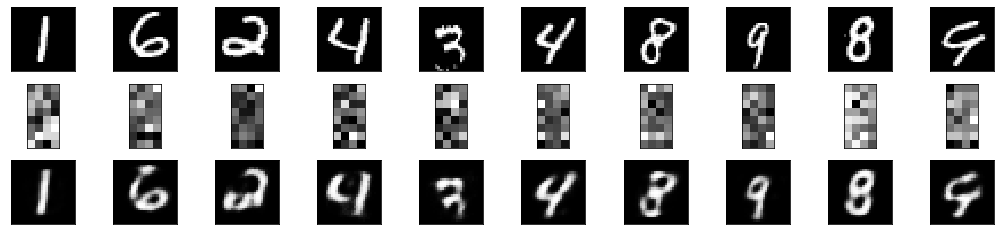

In [14]:
main()

In [34]:
a = mnist.load_data()
len(a[1][0])

10000

In [17]:
a[0][0][0]
#a[0][1][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## End Exercise #1

Give and high level description of the following code.

Give a line by line desription of:

  - `LoadData`
  - `CreateNN`
 

W1103 16:17:03.216217 4549936576 <ipython-input-59-8bc0cb55a8b8>:81] ROWS IN THE TWO FILES ARE NOT IN THE SAME ORDER


Index(['num_var44_0', 'num_med_var45_ult3', 'num_trasp_var33_out_hace3',
       'ind_var14_0', 'delta_imp_compra_var44_1y3', 'saldo_medio_var29_ult3',
       'ind_var41_0', 'imp_reemb_var33_ult1', 'num_op_var40_hace2'],
      dtype='object')
Train on 72219 samples, validate on 3801 samples
Epoch 1/5
72219/72219 [==============================] - 2s 21us/step - loss: 0.2817 - acc: 0.9575 - mean_squared_error: 0.0718 - val_loss: 0.1889 - val_acc: 0.9563 - val_mean_squared_error: 0.0426
Epoch 2/5
72219/72219 [==============================] - 1s 8us/step - loss: 0.1682 - acc: 0.9606 - mean_squared_error: 0.0380 - val_loss: 0.1809 - val_acc: 0.9563 - val_mean_squared_error: 0.0419
Epoch 3/5
72219/72219 [==============================] - 1s 8us/step - loss: 0.1662 - acc: 0.9606 - mean_squared_error: 0.0378 - val_loss: 0.1820 - val_acc: 0.9563 - val_mean_squared_error: 0.0419
Epoch 4/5
72219/72219 [==============================] - 1s 8us/step - loss: 0.1660 - acc: 0.9606 - mean_squared_erro

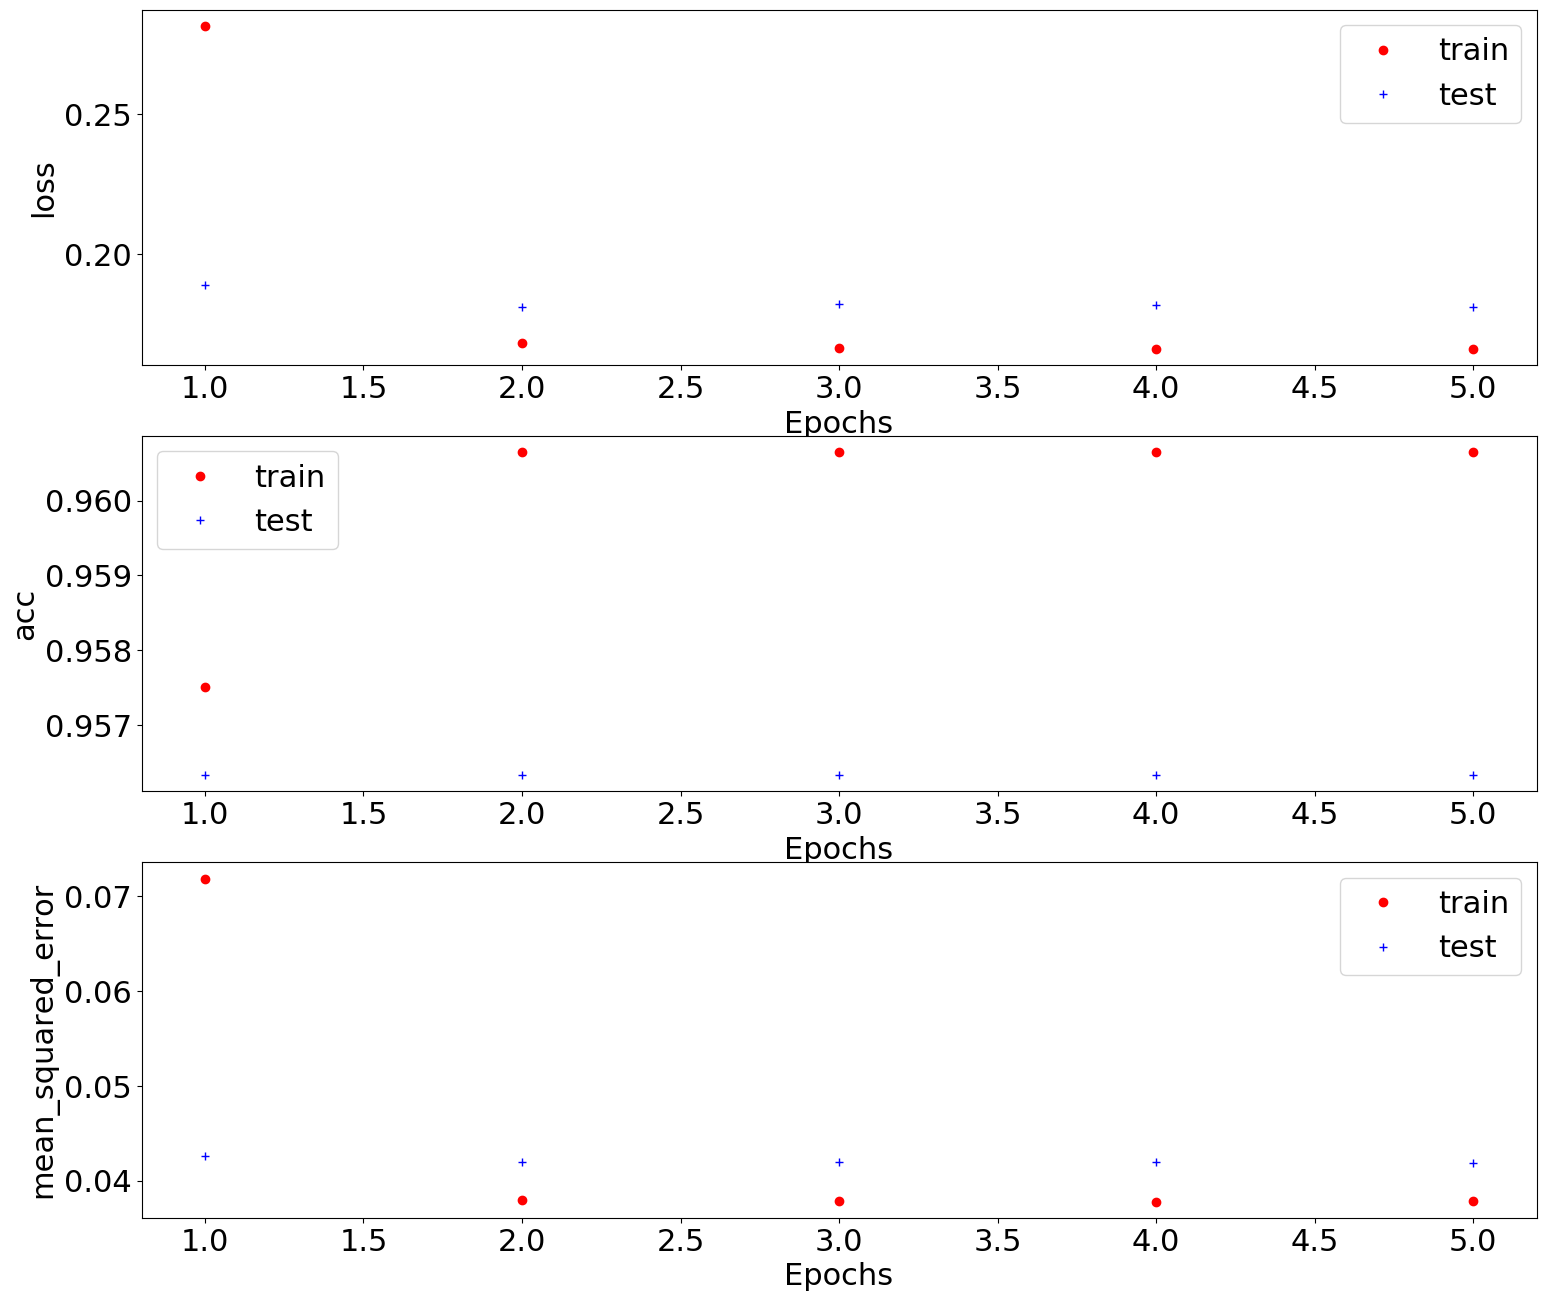

In [59]:
### import pandas as pd
import numpy as np
from sklearn import preprocessing
import logging 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf
from keras import backend as K  

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                    level=logging.INFO)
logger = logging.getLogger('')

#Columns selection
selectEach = 40

# Parameters
learning_rate = 0.01
num_steps = 5
batch_size = 128

# Network Parameters
n_hidden_2 = 5 # 1st layer number of neurons
num_input = 300
num_classes = 1

metrics = ['accuracy','mse']

#Plot parameters definition
##############################
#IGNORE THIS PART FOR THE EXAM
##############################
figure(num=None, figsize=(18, 16), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})
###############################

class LoadData:
    def __init__(self,**kargs):
        self.filesPath = kargs['fp']
        self.fileTarget = kargs['ft']
        self.fileFeatures = kargs['ff']
        
        
        
        
        
        
    def readFiles(self,fileName):
        fullPath = '%s/%s'%(self.filesPath,fileName)
        df = pd.read_csv(fullPath,delimiter=',')
        return df
    
    
    
    
    
    
    
    def downsizeFeatures(self,df):
        logger.info('MAKING A DIMENSION REDUCTION FOR THE FEATURES')
        numFull = df.shape[1]
        #Hint: % is the decimal part of a division 
        columnsSelected = {i for i in range(0,numFull) if i%selectEach==0}
        if 0 not in columnsSelected:
            columnsSelected.add(0)
        df = df.iloc[:,list(columnsSelected)]
        return df
    
    
    
    
    
    def createTrain(self):
        dfFeaturesFull = self.readFiles(self.fileFeatures)
        dfTarget = self.readFiles(self.fileTarget)
        logger.warning('ROWS IN THE TWO FILES ARE NOT IN THE SAME ORDER')
        dfFeatures = self.downsizeFeatures(dfFeaturesFull)
        dfJoin = dfFeatures.set_index('ID').join(dfTarget.set_index('ID'),how = 'inner')
        dfJoin.reset_index(inplace=True)
        Y = dfJoin.loc[:,'TARGET']
        dfJoin.drop(columns=['ID','TARGET'],inplace=True)
        print(dfJoin.columns)
        return dfJoin, Y

    
    
    
    
class CreateNN:
    def __init__(self,**kargs):
        self.activationFun = 'relu'
        self.X = kargs['x']
        self.Y = kargs['y']
        self.numFeatures = self.X.shape[1]
        self.n_hidden_1 = int(self.numFeatures / 2)
        self.modelPath = kargs['mp']
        modelName = kargs['mn']
        self.modelFile = os.path.join(self.modelPath,modelName)
        
        
        
        
        
    def modelDefinition(self):
        self.model = Sequential()
        self.model.add(Dense(num_input, input_dim=self.numFeatures,
                             activation=self.activationFun))
        self.model.add(Dense(self.n_hidden_1,activation=self.activationFun))
        self.model.add(Dense(n_hidden_2,activation=self.activationFun))
        self.model.add(Dense(num_classes,activation='sigmoid'))
        
        
        
        
        
        
    def modelCompile(self):
        sgd = SGD(lr=learning_rate)
        self.model.compile(loss='binary_crossentropy', optimizer=sgd,metrics=metrics)
        
        
        
        
        
    def modelTrain(self):
        history = self.model.fit(self.X, self.Y, epochs=num_steps,
                                 batch_size=batch_size,validation_split=0.05)
        self.saveModel()
        return history
    
    
    def saveModel(self):
        logger.info('SAVING MODEL TO %s'%self.modelFile)
        #self.model.save('pippo')
        #tf.saved_model.save(self.model, "modelTrained/")
        signature = tf.saved_model.signature_def_utils.predict_signature_def(                                                                        
        inputs={'image': self.model.input}, outputs={'scores': self.model.output})                                                                         
                                                                                                                                             
        builder = tf.saved_model.builder.SavedModelBuilder(self.modelPath)                                                                    
        builder.add_meta_graph_and_variables(                                                                                                        
        sess=K.get_session(),                                                                                                                    
        tags=[tf.saved_model.tag_constants.SERVING],                                                                                             
        signature_def_map={                                                                                                                      
            tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:                                                                
                signature                                                                                                                        
                })                                                                                                                                       
        builder.save()
    
    
    
    
    
    
class PlotGraphs:
    def __init__(self,**kargs):
        history= kargs['h']
        self.history_dict = history.history
        self.metList = []
        for cur_key in history.history.keys():
            if cur_key.find('val')!=0:
                self.metList.append(cur_key)
        print(self.metList)
        self.lenList = len(self.metList)
    
    def plotResults(self):
        plotPos = 1
        for cur_met in self.metList:
            cur_values = self.history_dict[cur_met]
            cur_val = self.history_dict['val_%s'%cur_met]
            epochs = range(1, len(cur_values) + 1)
            plt.subplot(self.lenList, 1, plotPos)
            plt.plot(epochs, cur_values, 'ro',label = 'train')
            plt.plot(epochs, cur_val, 'b+', label='test')
            plt.xlabel('Epochs')
            plt.ylabel(cur_met)
            plt.legend()
            #plt.gca().legend(('train','test'))
            plotPos += 1
        logger.info('SAVING PLOTS TO A FILE')
        plt.savefig('historyPlots')

        


def main():
    logger.info('START')
    start_time = datetime.now()
    filesPath = 'data/santAnder'
    fileTarget = 'target.csv'
    fileFeatures = 'features.csv'
    modelPath = 'data/santAnder/modelSaved'
    modelName = 'santAnderModel.h5'
    logger.info('INSTANTIATION OF LOADDATA')
    ld = LoadData(fp=filesPath,ff=fileFeatures,ft=fileTarget)
    X_train, Y_train = ld.createTrain()
    logger.info('INSTANTIATION OF CREATENN')
    cnn = CreateNN(x = X_train,y = Y_train,mp = modelPath, mn = modelName)
    cnn.modelDefinition()
    cnn.modelCompile()
    history = cnn.modelTrain()
    logger.info('INITIALIZATION OF PLOTGRAPH')
    pg = PlotGraphs(h=history)
    pg.plotResults()
    logger.info("EXECUTED IN %f SEC"%((datetime.now()-start_time)).total_seconds())
    logger.info('END')
    return X_train, Y_train
X_train,Y_train = main()

## End Exercise #2 

For the code below:

  - Give an *high level* description of what the code does
  - Give a *line by line* description of the methodos `makeJoin` and `preProcess`.

In [35]:
import os, sys
from datetime import datetime
import pandas as pd
import logging
from sklearn.cluster import KMeans
import argparse
import numpy as np
from sklearn import preprocessing

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger('')

dataFolder = 'data'
chifData = 'chifdata'
prospFile = 'all_prospects_france.csv'


class MakeClusters:
    def __init__(self,**kargs):
        self.outFile = kargs['fo']
        self.numClus = kargs['nk']
        self.numEmp = kargs['ne']
        self.siren = kargs['si']
        self.to = kargs['to']



    def makeClusters(self,df):
        logger.info('Defining KMeans with %i clusters',self.numClus)
        kmeans = KMeans(n_clusters=self.numClus)
        kmeans.fit(df)
        labels = kmeans.predict(df)
        centroids = kmeans.cluster_centers_
        logger.info('Adding labels to the dataframes')
        df['labels'] = labels
        df['Résultat 1'] = self.to
        df['Siren'] = self.siren
        return df

    def writeOutFile(self,df):
        logger.info('Writing out file to %s',self.outFile)
        df.to_csv(self.outFile,index=False)


class PrepareData:
    def __init__(self, **kargs):
        self.inFile = kargs['fi']
        self.inDir = kargs['di']
        self.numEmp = kargs['ne']

    def readOne(self):
        logger.info('Reading data from %s',self.inFile)
        self.dfPros = pd.read_csv(self.inFile,sep=',')
        print('columns for prof',self.dfPros.columns,self.dfPros.shape,self.dfPros.dtypes)

    def readMultiple(self):
        self.dfInfo = pd.DataFrame()
        for filename in os.listdir(self.inDir):
            fi = "%s/%s"%(self.inDir,filename)
            logger.info('Readin file %s',fi)
            curdf = pd.read_csv(fi,sep=';',usecols=['Siren','Résultat 1'])
            self.dfInfo = self.dfInfo.append(curdf)
        print('columns for info',self.dfInfo.columns,self.dfInfo.shape,self.dfInfo.dtypes)

    def makeJoin(self):
        logger.info('Making the join')
        self.dfJoin = self.dfPros.set_index('SIREN').join(self.dfInfo.set_index('Siren'),how='inner')
        self.dfJoin.reset_index(inplace=True)
        print('shape after join:',self.dfJoin.shape,self.dfJoin.columns)
        return self.dfJoin

    def preProcess(self,df):
        df.dropna(inplace=True)
        logger.info('Removing rows with more that %i employes',self.numEmp)
        df = df.loc[df['eff_category']<=self.numEmp]
        logger.info('SCALING VARIABILES')
        min_max_scaler = preprocessing.MinMaxScaler()
        np_scaled = min_max_scaler.fit_transform(pd.DataFrame(df.loc[:,'Résultat 1']))
        df['to_norm'] = np_scaled
        to = df[['Résultat 1']]
        siren = df[['index']]
        df.drop(['Résultat 1','index'],axis=1,inplace=True)
        return df, to, siren

def main():
    start=datetime.now()
    logger.info("START")
    inFile = "%s/%s"%(dataFolder,prospFile)
    inDir = "%s/%s"%(dataFolder,chifData)
    numClus = 5
    outFile = 'testClustering.csv'
    numEmp = 10
    logger.info("RUNNING WITH INFILE %s, OUTFILE %s , NUM EMPLOIES %d AND NUM OF CLUSTER %d",inFile,outFile,numEmp,numClus)
    logger.info('INSTANTIATE PREPAREDATA')
    pdt = PrepareData(fi=inFile,di=inDir,ne=numEmp)
    pdt.readOne()
    pdt.readMultiple()
    df = pdt.makeJoin()
    df,to,siren = pdt.preProcess(df)
    logger.info('INSTANTIATE MAKECLUSTER')
    mc = MakeClusters(fo=outFile,nk=numClus,ne=numEmp,si=siren,to=to)
    df = mc.makeClusters(df)
    mc.writeOutFile(df)
    logger.info('DONE IN %s',str(datetime.now()-start))
    logger.info('END')
    return df

In [36]:
df=main()

columns for prof Index(['SIREN', 'eff_category', 'business_segment'], dtype='object') (466768, 3) SIREN                 int64
eff_category        float64
business_segment      int64
dtype: object
columns for info Index(['Siren', 'Résultat 1'], dtype='object') (44282, 2) Siren           int64
Résultat 1    float64
dtype: object
shape after join: (40689, 4) Index(['index', 'eff_category', 'business_segment', 'Résultat 1'], dtype='object')


In [37]:
df

,eff_category,business_segment,to_norm,labels,Résultat 1,Siren
4,4.0,22,0.140289,2,60475.0,7280803
5,7.5,27,0.140688,3,89270.0,15650138
6,7.5,31,0.140705,3,90470.0,16550113
7,4.0,18,0.139538,2,6248.0,25720715
12,1.5,21,0.139486,4,2540.0,57809964
14,0.0,16,0.151235,4,850410.0,61200226
15,4.0,18,0.131434,2,-578540.0,61201083
16,7.5,15,0.138865,2,-42320.0,63806335
28,1.5,25,0.139770,1,23027.0,71500300
30,0.0,12,0.140328,0,63269.0,72502735
